   # MODEL TO PREDICT FINANCIAL PERFORMANCE #


## i) Import the required Libraries ##

In [1]:
# The import requirments

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ii) Load the Train & Test Datasets ##

In [2]:
# We load the data using pandas

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# We get the target variables names

targets_names = [column for column in train_data if column not in test_data]
print(f'Target columns: {targets_names}')

Target columns: ['Q0_TOTAL_ASSETS', 'Q0_TOTAL_LIABILITIES', 'Q0_TOTAL_STOCKHOLDERS_EQUITY', 'Q0_GROSS_PROFIT', 'Q0_COST_OF_REVENUES', 'Q0_REVENUES', 'Q0_OPERATING_INCOME', 'Q0_OPERATING_EXPENSES', 'Q0_EBITDA']


In [4]:
# Checking the shape of data

print(f"Train_Data Shape : {train_data.shape}")
print(f"Test_Data Shape : {test_data.shape}")

Train_Data Shape : (1624, 212)
Test_Data Shape : (406, 203)


In [5]:
# now we merge both "train_data" and "test_data" , for data preprocessing 

# first create a column to identify which feature is for training and which for testing
train_data['is_train'] = True
test_data['is_train'] = False

data = pd.concat([train_data, test_data], axis = 0, ignore_index = True)

In [6]:
# It prints information about the DataFrame, including the data types of each column,


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Columns: 213 entries, Id to is_train
dtypes: bool(1), float64(207), int64(1), object(4)
memory usage: 3.3+ MB


In [7]:
#For numeric columns, it gives summary statistics.

data.describe(include='all')

,Id,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,...,Q10_NET_INCOME,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERATING_EXPENSES,Q10_EBITDA,Q10_DEPRECIATION_AND_AMORTIZATION,Q10_fiscal_year_end,is_train
count,2030.000000,2003,2030,1928.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,911.000000,...,1.623000e+03,1.761000e+03,1.642000e+03,1.646000e+03,1.763000e+03,1.769000e+03,1.757000e+03,1.751000e+03,2030.000000,2030
unique,NaN,113,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Biotechnology,Healthcare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,273,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624
mean,1014.500000,NaN,NaN,9189.264004,5.559431,5.648399,5.822064,5.570107,5.738790,inf,...,7.557222e+07,4.924393e+08,8.847782e+08,1.389784e+09,1.231424e+08,3.803774e+08,1.104672e+08,-1.414586e+07,0.006404,NaN
std,586.154843,NaN,NaN,32948.840196,2.846787,2.852538,2.848941,2.778933,2.879233,NaN,...,5.087831e+08,2.634294e+09,4.059303e+09,5.870136e+09,6.707917e+08,1.582816e+09,2.092779e+09,1.947589e+09,0.079788,NaN
min,0.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000010,...,-3.944000e+09,-2.170800e+10,-1.880579e+09,-4.500000e+06,-4.475000e+09,-1.439000e+06,-5.090500e+10,-5.418200e+10,0.000000,NaN
25%,507.250000,NaN,NaN,133.000000,3.000000,3.000000,3.000000,3.000000,3.000000,12.065630,...,-1.101950e+07,1.550589e+06,1.094000e+06,8.084984e+06,-7.930724e+06,7.637000e+06,-1.100700e+07,0.000000e+00,0.000000,NaN
50%,1014.500000,NaN,NaN,874.500000,6.000000,6.000000,6.000000,6.000000,6.000000,21.375002,...,-2.103550e+05,3.423900e+07,2.957950e+07,1.031810e+08,-3.830400e+04,3.963300e+07,-2.684400e+05,0.000000e+00,0.000000,NaN
75%,1521.750000,NaN,NaN,5183.500000,8.000000,8.000000,8.000000,8.000000,8.000000,37.000000,...,2.554250e+07,2.271000e+08,3.177750e+08,6.175560e+08,4.419050e+07,1.791000e+08,4.155500e+07,0.000000e+00,0.000000,NaN


In [8]:
# There are multiple companies operating in various target industries and sectors
company_info = data[['Id','industry','sector','fullTimeEmployees','auditRisk','boardRisk','compensationRisk','shareHolderRightsRisk','overallRisk','trailingPE','forwardPE','floatShares','sharesOutstanding','trailingEps','forwardEps','targetHighPrice','targetLowPrice','targetMeanPrice','targetMedianPrice','recommendationMean','recommendationKey','numberOfAnalystOpinions']]

In [9]:
company_info.head()

,Id,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,...,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions
0,196,Personal Services,Consumer Cyclical,1174.0,5.0,10.0,9.0,4.0,8.0,12.549223,...,14981500.0,1.93,2.30,40.0,28.00,36.00,38.0,1.5,strong_buy,4.0
1,1568,Building Products & Equipment,Industrials,3600.0,4.0,4.0,3.0,4.0,3.0,1222.000000,...,58107000.0,0.01,0.89,18.0,10.00,15.00,17.0,2.5,buy,3.0
2,1218,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,Scientific & Technical Instruments,Technology,143.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15846900.0,-3.68,-2.25,14.0,3.17,9.29,10.0,2.8,hold,4.0
4,783,Drug Manufacturers - Specialty & Generic,Healthcare,36.0,NaN,NaN,NaN,NaN,NaN,1.231544,...,37207800.0,1.49,0.25,30.0,7.00,12.50,8.0,1.6,buy,5.0


In [10]:
company_info.industry.value_counts()

Biotechnology                               273
Software - Application                      119
Medical Devices                             108
Software - Infrastructure                    74
Drug Manufacturers - Specialty & Generic     65
                                           ... 
Utilities - Independent Power Producers       2
Aluminum                                      2
Copper                                        2
Beverages - Brewers                           1
Textile Manufacturing                         1
Name: industry, Length: 113, dtype: int64

## iii) EDA ##

In [11]:
# find the categorical data
categorical_columns = []
for column in data.columns:
    if data[column].dtype == 'O':
        categorical_columns.append(column)
        
print(f"categorical columns are - {categorical_columns}")

categorical columns are - ['industry', 'sector', 'recommendationKey', 'financialCurrency']


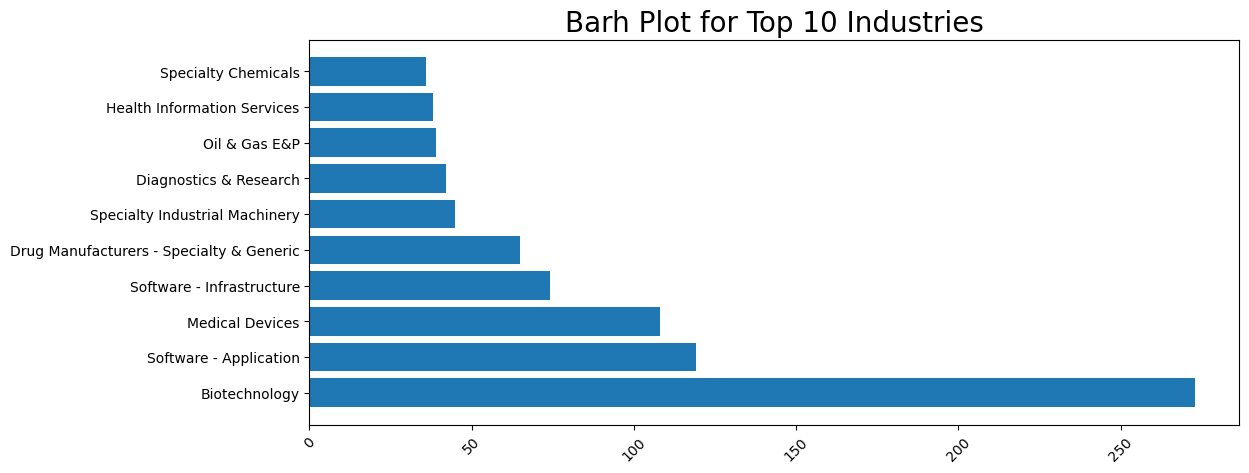

In [12]:
# Barh Plot for Top 10 Industries
plt.figure(figsize=(12,5))
plt.barh(y = data['industry'].value_counts().head(10).index ,width=data['industry'].value_counts().head(10).values)
plt.title('Barh Plot for Top 10 Industries' ,fontsize=20)
plt.xticks(rotation=45)
plt.show()

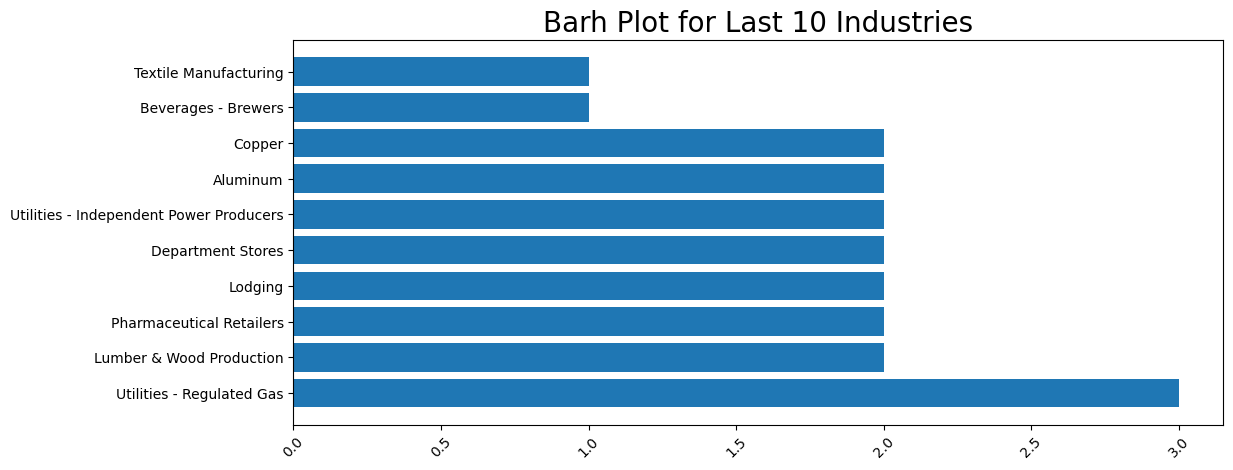

In [13]:
# Barh Plot for Last 10 Industries
plt.figure(figsize=(12,5))
plt.barh(y = data['industry'].value_counts().tail(10).index ,width=data['industry'].value_counts().tail(10).values)
plt.title('Barh Plot for Last 10 Industries' ,fontsize=20)
plt.xticks(rotation=45)
plt.show()

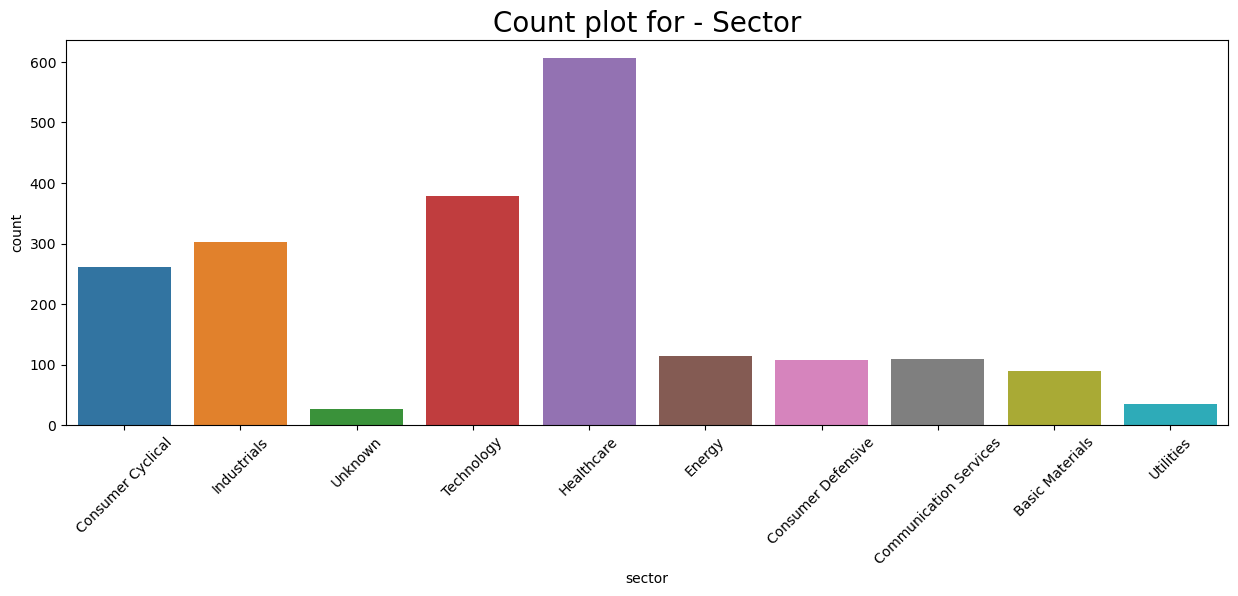

In [14]:
# count plot for "Sector"
plt.figure(figsize=(15,5))
sns.countplot(x=data['sector'])
plt.title('Count plot for - Sector' ,fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [15]:
company_info.recommendationKey.value_counts()

buy             1221
hold             398
none             256
strong_buy       117
underperform      13
sell               1
Name: recommendationKey, dtype: int64

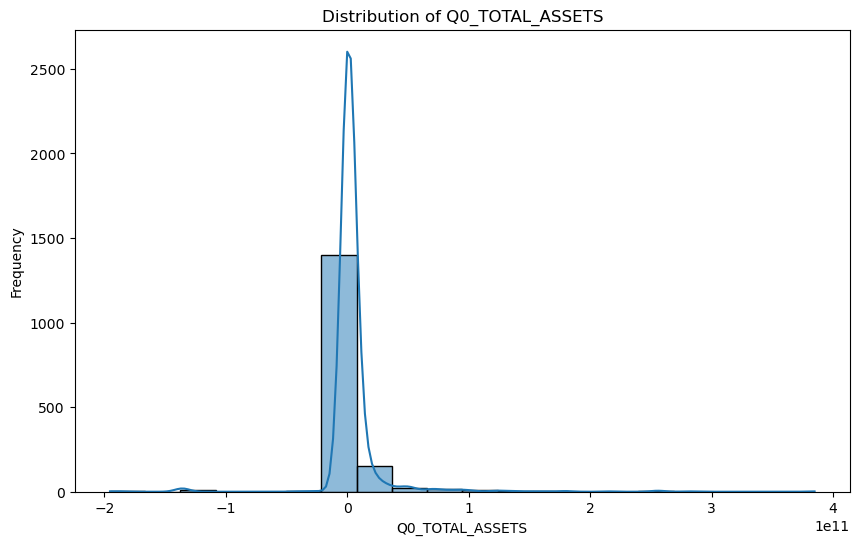

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Q0_TOTAL_ASSETS'], bins=20, kde=True)
plt.title('Distribution of Q0_TOTAL_ASSETS')
plt.xlabel('Q0_TOTAL_ASSETS')
plt.ylabel('Frequency')
plt.show()

C:\Users\91826\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\91826\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\91826\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\91826\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fu

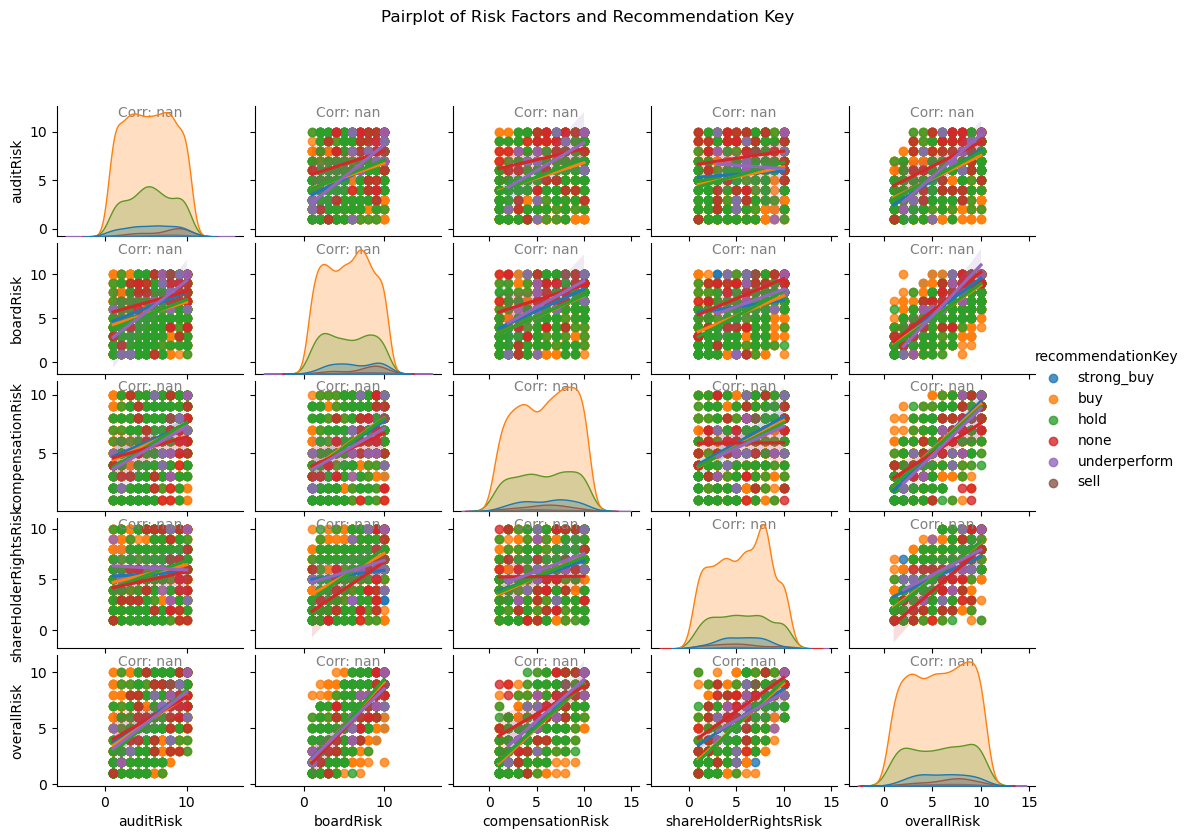

In [17]:
# Create a pairplot with regression lines and KDE plots
g = sns.pairplot(data=company_info,
                 vars=['auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk'],
                 hue='recommendationKey',
                 kind='reg',
                 diag_kind='kde',
                 diag_kws=dict(shade=True))

# Customize plot aesthetics
g.fig.suptitle('Pairplot of Risk Factors and Recommendation Key', y=1.02)
g.fig.set_size_inches(12, 8)

# Adjust subplots spacing
plt.subplots_adjust(top=0.9)

# Add title to each subplot
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=12)

# Add overall correlation coefficient to the plot
corr = np.corrcoef(company_info[['auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk']], rowvar=False)
corr = corr.round(2)
for i, ax in enumerate(g.axes.flat):
    ax.annotate(f'Corr: {corr[i//5, i%5]}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='center', fontsize=10, color='gray')

# Display the plot
plt.show()


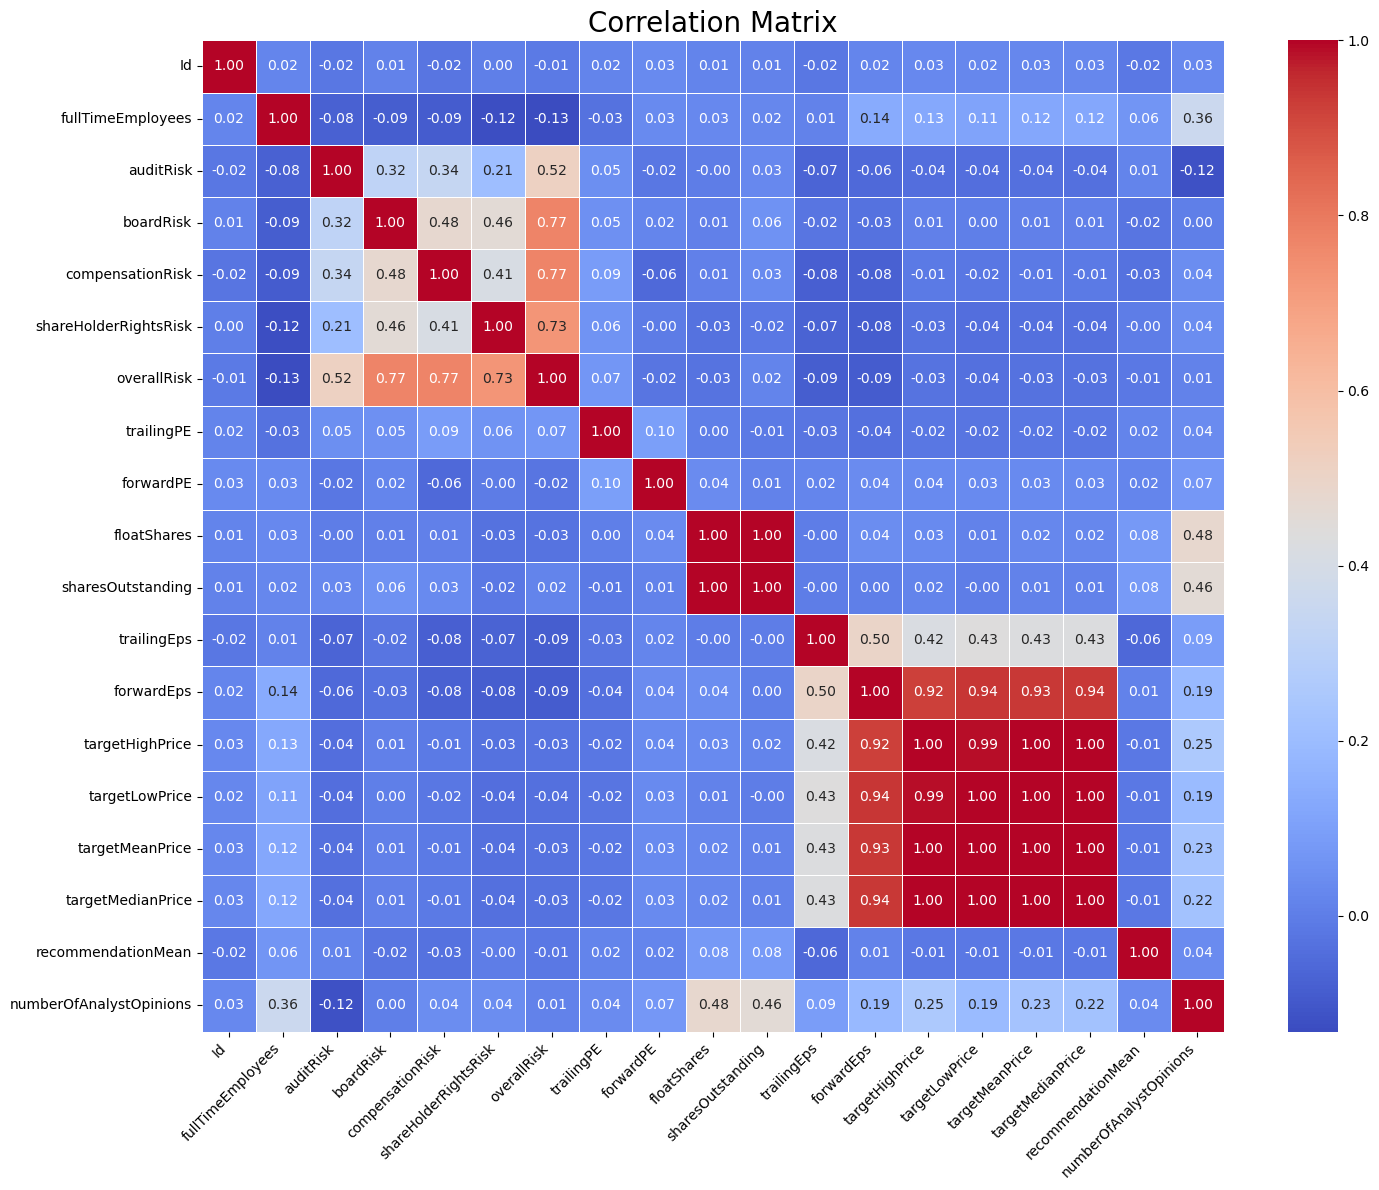

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns and compute correlation matrix
company_info_num = company_info.drop(['recommendationKey', 'industry', 'sector'], axis=1)
company_info_corr = company_info_num.corr()

# Set up the figure and axis
plt.figure(figsize=(15, 12))

# Create heatmap
sns.heatmap(company_info_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize plot aesthetics
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


## iv) Elementray Data Cleaning Operation ##

In [19]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id                                     0
industry                              27
sector                                 0
fullTimeEmployees                    102
auditRisk                            625
                                    ... 
Q10_OPERATING_EXPENSES               261
Q10_EBITDA                           273
Q10_DEPRECIATION_AND_AMORTIZATION    279
Q10_fiscal_year_end                    0
is_train                               0
Length: 213, dtype: int64


In [20]:
print('Missing data status:\n')

# Initialize counters
under_10_percent = 0
ten_to_20_percent = 0
twenty_to_50_percent = 0
over_50_percent = 0

# Calculate percentage of missing data for each column
for col in data.columns:
    if data[col].isnull().any():
        percent_missing = 100 * data[col].isnull().sum() / len(data)
        if percent_missing < 10:
            under_10_percent += 1
        elif 10 <= percent_missing < 20:
            ten_to_20_percent += 1
        elif 20 <= percent_missing < 50:
            twenty_to_50_percent += 1
        else:
            over_50_percent += 1

# Print the results
print(f'Columns with under 10% missing data:\t{under_10_percent}')
print(f'Columns with 10-20% missing data:\t{ten_to_20_percent}')
print(f'Columns with 20-50% missing data:\t{twenty_to_50_percent}')
print(f'Columns with over 50% missing data:\t{over_50_percent}')


Missing data status:

Columns with under 10% missing data:	137
Columns with 10-20% missing data:	44
Columns with 20-50% missing data:	16
Columns with over 50% missing data:	1


In [21]:
for column in data.columns:
    if data[column].dtype == 'O':  # Categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Numerical columns
        data[column].fillna(data[column].median(), inplace=True)

In [22]:
data.isnull().sum()

Id                                   0
industry                             0
sector                               0
fullTimeEmployees                    0
auditRisk                            0
                                    ..
Q10_OPERATING_EXPENSES               0
Q10_EBITDA                           0
Q10_DEPRECIATION_AND_AMORTIZATION    0
Q10_fiscal_year_end                  0
is_train                             0
Length: 213, dtype: int64

## v) Data Preprocesssing ##

In [23]:
data_num = data.drop(['Id','industry','sector','recommendationKey','financialCurrency'],axis=1)
data_num.replace([np.inf,-np.inf],np.nan,inplace=True)
numerical_columns = list(data_num.columns)

for n_col in numerical_columns:
    median_col_value = data_num[n_col].median()
    data_num[n_col].fillna(median_col_value,inplace=True)

In [24]:
#Check for Constant Columns and Zero Variance
constant_columns = data.columns[data.nunique() == 1]
data.drop(columns=constant_columns, inplace=True)

#Check for Perfect Multicollinearity
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) == 1.0:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)
data.drop(columns=highly_correlated, inplace=True)

# Handle Missing Values

# Now, calculate correlations after handling the issues
corr_num_financials = data.corr()

# Print correlation results for target columns
target_cols = ['Q0_TOTAL_ASSETS', 'Q0_TOTAL_LIABILITIES', 'Q0_TOTAL_STOCKHOLDERS_EQUITY', 
               'Q0_GROSS_PROFIT', 'Q0_COST_OF_REVENUES', 'Q0_REVENUES', 
               'Q0_OPERATING_INCOME', 'Q0_OPERATING_EXPENSES', 'Q0_EBITDA']

for t_col in target_cols:
    print('Target column:', t_col)
    print(pd.Series(corr_num_financials[t_col].sort_values(ascending=False)))


C:\Users\91826\AppData\Local\Temp\ipykernel_36936\1690254137.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()
C:\Users\91826\AppData\Local\Temp\ipykernel_36936\1690254137.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num_financials = data.corr()


Target column: Q0_TOTAL_ASSETS
Q0_TOTAL_ASSETS                    1.000000
Q0_TOTAL_LIABILITIES               0.940206
Q0_TOTAL_STOCKHOLDERS_EQUITY       0.868568
Q4_TOTAL_NONCURRENT_LIABILITIES    0.691932
Q4_TOTAL_LIABILITIES               0.685030
                                     ...   
Q7_TOTAL_LIABILITIES_AND_EQUITY   -0.721115
Q7_TOTAL_ASSETS                   -0.721115
Q3_TOTAL_NONCURRENT_ASSETS        -0.726655
Q3_TOTAL_LIABILITIES_AND_EQUITY   -0.744380
Q3_TOTAL_ASSETS                   -0.744405
Name: Q0_TOTAL_ASSETS, Length: 209, dtype: float64
Target column: Q0_TOTAL_LIABILITIES
Q0_TOTAL_LIABILITIES               1.000000
Q0_TOTAL_ASSETS                    0.940206
Q4_TOTAL_LIABILITIES               0.795208
Q4_TOTAL_NONCURRENT_LIABILITIES    0.785160
Q8_TOTAL_NONCURRENT_LIABILITIES    0.742058
                                     ...   
Q7_TOTAL_ASSETS                   -0.728208
Q3_TOTAL_NONCURRENT_LIABILITIES   -0.746550
Q3_TOTAL_LIABILITIES_AND_EQUITY   -0.747101
Q3

In [25]:
for column in ['industry','sector','recommendationKey','financialCurrency']:
    print(f'====================== Unique Values for : {column}-{data[column].nunique()} ======================\n')
    print(data[column].value_counts() ,'\n')

====================== Unique Values for : industry-113 ======================

Biotechnology                               300
Software - Application                      119
Medical Devices                             108
Software - Infrastructure                    74
Drug Manufacturers - Specialty & Generic     65
                                           ... 
Utilities - Independent Power Producers       2
Aluminum                                      2
Copper                                        2
Beverages - Brewers                           1
Textile Manufacturing                         1
Name: industry, Length: 113, dtype: int64 

====================== Unique Values for : sector-10 ======================

Healthcare                606
Technology                379
Industrials               302
Consumer Cyclical         261
Energy                    114
Communication Services    109
Consumer Defensive        108
Basic Materials            90
Utilities                  34
U

In [26]:
data.describe(include = 'O')


,industry,sector,recommendationKey,financialCurrency
count,2030,2030,2030,2030
unique,113,10,6,2
top,Biotechnology,Healthcare,buy,USD
freq,300,606,1245,2029


In [27]:
one_hot_meta_data = pd.get_dummies(data['sector'])

one_hot_meta_data.head()

,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Healthcare,Industrials,Technology,Unknown,Utilities
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0


In [28]:
data.drop('sector' ,axis=1 ,inplace=True)
data = pd.concat([data , one_hot_meta_data] ,axis=1 )
data.head()

,Id,industry,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,...,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Healthcare,Industrials,Technology,Unknown,Utilities
0,196,Personal Services,1174.0,5.0,10.0,9.0,4.0,8.0,12.549223,10.530435,...,0,0,1,0,0,0,0,0,0,0
1,1568,Building Products & Equipment,3600.0,4.0,4.0,3.0,4.0,3.0,1222.000000,13.730337,...,0,0,0,0,0,0,1,0,0,0
2,1218,Biotechnology,874.5,6.0,6.0,6.0,6.0,6.0,21.375002,9.453575,...,0,0,0,0,0,0,0,0,1,0
3,23,Scientific & Technical Instruments,143.0,6.0,6.0,6.0,6.0,6.0,21.375002,-1.226667,...,0,0,0,0,0,0,0,1,0,0
4,783,Drug Manufacturers - Specialty & Generic,36.0,6.0,6.0,6.0,6.0,6.0,1.231544,7.340000,...,0,0,0,0,0,1,0,0,0,0


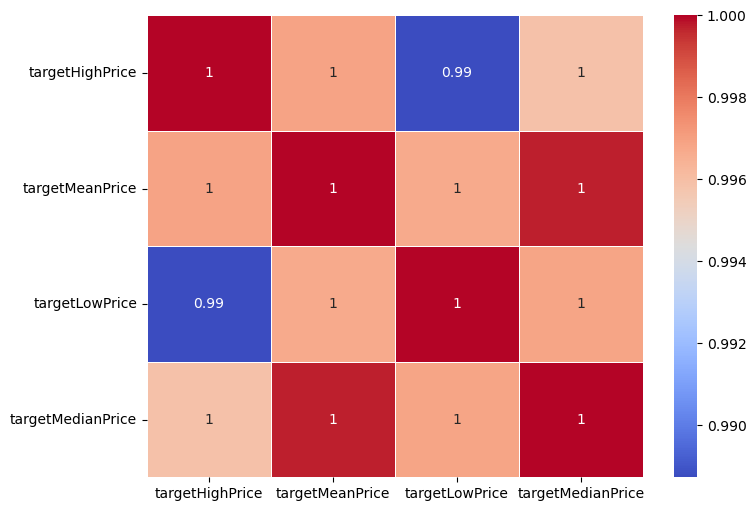

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customize the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['targetHighPrice', 'targetMeanPrice', 'targetLowPrice', 'targetMedianPrice']].corr(),
            annot=True,
            cmap='coolwarm',  # Custom color map
            linewidths=0.5,   # Adjust line widths
            annot_kws={"size": 10})  # Adjust annotation font size

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [30]:
data.drop(['floatShares' , 'targetHighPrice' , 'targetLowPrice' ,'targetMeanPrice' ,
                 'totalCashPerShare', 'industry'] ,axis=1 ,inplace=True)

In [31]:
# Drop all string data columns
data.drop(data.select_dtypes(include=['object']).columns, axis=1, inplace=True)

In [32]:
# Replace infinity and large values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing NaN values
data.dropna(axis=0, inplace=True)


In [33]:
data

,Id,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,sharesOutstanding,...,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Healthcare,Industrials,Technology,Unknown,Utilities
0,196,1174.0,5.0,10.0,9.0,4.0,8.0,12.549223,10.530435,14981500.0,...,0,0,1,0,0,0,0,0,0,0
1,1568,3600.0,4.0,4.0,3.0,4.0,3.0,1222.000000,13.730337,58107000.0,...,0,0,0,0,0,0,1,0,0,0
2,1218,874.5,6.0,6.0,6.0,6.0,6.0,21.375002,9.453575,56472700.0,...,0,0,0,0,0,0,0,0,1,0
3,23,143.0,6.0,6.0,6.0,6.0,6.0,21.375002,-1.226667,15846900.0,...,0,0,0,0,0,0,0,1,0,0
4,783,36.0,6.0,6.0,6.0,6.0,6.0,1.231544,7.340000,37207800.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,885,14200.0,7.0,9.0,9.0,10.0,10.0,27.408330,22.919860,251291008.0,...,0,0,0,1,0,0,0,0,0,0
2026,385,874.5,6.0,6.0,6.0,6.0,6.0,21.375002,9.453575,56472700.0,...,0,0,0,0,0,0,0,0,1,0
2027,711,173.0,6.0,5.0,9.0,8.0,7.0,21.375002,-4.490446,24488800.0,...,0,0,0,0,0,1,0,0,0,0
2028,272,1030.0,10.0,9.0,10.0,4.0,9.0,35.500000,44.375000,131313000.0,...,0,0,0,0,0,1,0,0,0,0


## vi) Model Predictions and Finding R2 Score ##

In [34]:
# separate test_data

test_data = data[data['is_train'] == False]                    # first identify rows where "is_train"==False for test data
test_data.drop('is_train', axis = 1, inplace=True)     # now drop the "is_train" and "id" column
test_data.drop(targets_names, axis = 1, inplace = True)        # from test_data drop all target_names
test_data.reset_index(drop = True, inplace = True)             # reset test_data's index
print(f"Test Data Shape : {test_data.shape}")

test_data.head()

Test Data Shape : (402, 204)


C:\Users\91826\AppData\Local\Temp\ipykernel_36936\2841483347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('is_train', axis = 1, inplace=True)     # now drop the "is_train" and "id" column
C:\Users\91826\AppData\Local\Temp\ipykernel_36936\2841483347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(targets_names, axis = 1, inplace = True)        # from test_data drop all target_names


,Id,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,sharesOutstanding,...,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Healthcare,Industrials,Technology,Unknown,Utilities
0,480,874.5,6.0,6.0,6.0,6.0,6.0,21.375002,9.453575,78308400.0,...,0,0,0,0,0,1,0,0,0,0
1,573,7600.0,6.0,7.0,6.0,4.0,5.0,90.500000,9.362069,306544000.0,...,0,0,0,0,0,1,0,0,0,0
2,1967,874.5,6.0,6.0,6.0,6.0,6.0,21.375002,-2.180000,9359090.0,...,0,0,0,0,0,0,0,1,0,0
3,57,5200.0,1.0,5.0,4.0,5.0,3.0,23.500002,15.295858,59100000.0,...,0,0,0,0,0,0,1,0,0,0
4,131,6700.0,1.0,4.0,4.0,6.0,3.0,20.748793,17.821577,127577000.0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
# separate train_data

train_data = data[data['is_train'] == True]                    # first identify rows where "is_train"==True for test data
train_data.drop('is_train', axis = 1, inplace=True)    # now drop the "is_train" and "id" column
train_data.drop(targets_names, axis = 1, inplace = True)       # drop all target_names
print(f"Train Data Shape : {train_data.shape}")

train_data.head()

Train Data Shape : (1611, 204)


C:\Users\91826\AppData\Local\Temp\ipykernel_36936\2087148813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('is_train', axis = 1, inplace=True)    # now drop the "is_train" and "id" column
C:\Users\91826\AppData\Local\Temp\ipykernel_36936\2087148813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(targets_names, axis = 1, inplace = True)       # drop all target_names


,Id,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,sharesOutstanding,...,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Healthcare,Industrials,Technology,Unknown,Utilities
0,196,1174.0,5.0,10.0,9.0,4.0,8.0,12.549223,10.530435,14981500.0,...,0,0,1,0,0,0,0,0,0,0
1,1568,3600.0,4.0,4.0,3.0,4.0,3.0,1222.000000,13.730337,58107000.0,...,0,0,0,0,0,0,1,0,0,0
2,1218,874.5,6.0,6.0,6.0,6.0,6.0,21.375002,9.453575,56472700.0,...,0,0,0,0,0,0,0,0,1,0
3,23,143.0,6.0,6.0,6.0,6.0,6.0,21.375002,-1.226667,15846900.0,...,0,0,0,0,0,0,0,1,0,0
4,783,36.0,6.0,6.0,6.0,6.0,6.0,1.231544,7.340000,37207800.0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
# separate target variables

target_data = data[data['is_train'] == True]                    # first identify rows where "is_train"==True for test data
target_data = target_data[targets_names].copy()

print(f"Target data shape : {target_data.shape}")

target_data.head()

Target data shape : (1611, 9)


,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA
0,1.192950e+09,1.055816e+09,1.371340e+08,25598000.0,6.189900e+07,4.299200e+07,1.522200e+07,10383000.0,15215000.0
1,1.219954e+09,8.350460e+08,3.849080e+08,111786000.0,2.177960e+08,3.295820e+08,2.890800e+07,85522000.0,26264000.0
2,-1.358200e+11,-3.797200e+10,-9.784800e+10,-435000000.0,4.445000e+09,4.010000e+09,-1.472000e+09,219000000.0,-654000000.0
3,8.329800e+07,1.604000e+07,-3.163300e+07,494000.0,3.339000e+06,3.833000e+06,-1.234800e+07,12842000.0,-12348000.0
4,1.485460e+08,5.655500e+07,9.199100e+07,1761000.0,-2.375000e+06,-6.140000e+05,-1.009800e+07,11859000.0,-10098000.0


In [37]:
# import k-nearest-neighbour-regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(metric='euclidean' ,weights='distance' ,n_neighbors=5)

KNN_results = {}
# Iterate over each target variable
for target in targets_names:
    X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Id' ,axis=1), 
                                                        target_data[target], 
                                                        test_size=0.2, 
                                                        random_state=42)    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = r2_score(y_test, y_pred)
            
    # Store the R-squared score in the results dictionary
    KNN_results[target] = score

# Print the last 10 records of R2 scores for Linear Regression
print("R2 scores for K nearest Regressor : \n")
for target, score in KNN_results.items():
    print(f"{target} :  {' '*(35-len(target))}{score:.2f}")

R2 scores for K nearest Regressor : 

Q0_TOTAL_ASSETS :                      0.96
Q0_TOTAL_LIABILITIES :                 0.96
Q0_TOTAL_STOCKHOLDERS_EQUITY :         0.76
Q0_GROSS_PROFIT :                      0.46
Q0_COST_OF_REVENUES :                  0.70
Q0_REVENUES :                          0.85
Q0_OPERATING_INCOME :                  0.28
Q0_OPERATING_EXPENSES :                0.21
Q0_EBITDA :                            0.01


In [38]:
# import Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=25)
tree_results = {}

# Iterate over each target variable
for target in targets_names:
    X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Id' ,axis=1), 
                                                        target_data[target], 
                                                        test_size=0.2, 
                                                        random_state=4)    
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = r2_score(y_test, y_pred)
            
    # Store the R-squared score in the results dictionary
    tree_results[target] = score

# Print the last 10 records of R2 scores for Decision Tree
print("R2 scores for Decision Tree Regressor : \n")
for target, score in tree_results.items():
    print(f"{target} :  {' '*(35-len(target))}{score:.2f}")


R2 scores for Decision Tree Regressor : 

Q0_TOTAL_ASSETS :                      0.66
Q0_TOTAL_LIABILITIES :                 0.07
Q0_TOTAL_STOCKHOLDERS_EQUITY :         0.86
Q0_GROSS_PROFIT :                      0.93
Q0_COST_OF_REVENUES :                  0.57
Q0_REVENUES :                          0.95
Q0_OPERATING_INCOME :                  0.80
Q0_OPERATING_EXPENSES :                0.12
Q0_EBITDA :                            0.66


In [39]:
from sklearn.linear_model import Lasso

# Create Lasso Regression model
lasso = Lasso(alpha=0.1, random_state=19)  # You can adjust the regularization parameter alpha as needed

# Create dictionary to store Lasso Regression results
lasso_results = {}

# Iterate over each target variable
for target in targets_names:
    X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Id', axis=1), 
                                                        target_data[target], 
                                                        test_size=0.2, 
                                                        random_state=4)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    score = r2_score(y_test, y_pred)
            
    # Store the R-squared score in the results dictionary
    lasso_results[target] = score

# Print the R2 scores for Lasso Regression
print("\nR2 scores for Lasso Regression: \n")
for target, score in lasso_results.items():
    print(f"{target} :  {' '*(35-len(target))}{score:.2f}")


C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+20, tolerance: 9.339e+19
  model = cd_fast.enet_coordinate_descent(
C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.058e+20, tolerance: 3.819e+19
  model = cd_fast.enet_coordinate_descent(
C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+20, toleranc


R2 scores for Lasso Regression: 

Q0_TOTAL_ASSETS :                      0.85
Q0_TOTAL_LIABILITIES :                 0.61
Q0_TOTAL_STOCKHOLDERS_EQUITY :         0.95
Q0_GROSS_PROFIT :                      0.99
Q0_COST_OF_REVENUES :                  0.79
Q0_REVENUES :                          0.89
Q0_OPERATING_INCOME :                  0.93
Q0_OPERATING_EXPENSES :                0.96
Q0_EBITDA :                            0.87


C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+18, tolerance: 3.273e+17
  model = cd_fast.enet_coordinate_descent(


In [40]:
# import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=19)

# Create dictionary to store Gradient Boosting Regressor results
gbr_results = {}

# Iterate over each target variable
for target in targets_names:
    X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Id', axis=1), 
                                                        target_data[target], 
                                                        test_size=0.2, 
                                                        random_state=4)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    score = r2_score(y_test, y_pred)
            
    # Store the R-squared score in the results dictionary
    gbr_results[target] = score

# Print the R2 scores for Gradient Boosting Regressor
print("\nR2 scores for Gradient Boosting Regressor: \n")
for target, score in gbr_results.items():
    print(f"{target} :  {' '*(35-len(target))}{score:.2f}")


R2 scores for Gradient Boosting Regressor: 

Q0_TOTAL_ASSETS :                      0.72
Q0_TOTAL_LIABILITIES :                 0.53
Q0_TOTAL_STOCKHOLDERS_EQUITY :         0.96
Q0_GROSS_PROFIT :                      0.94
Q0_COST_OF_REVENUES :                  0.87
Q0_REVENUES :                          0.99
Q0_OPERATING_INCOME :                  0.72
Q0_OPERATING_EXPENSES :                1.00
Q0_EBITDA :                            -0.22


In [41]:
# import Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=17 ,random_state=19)
forest_results = {}

# Iterate over each target variable
for target in targets_names:
    X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Id' ,axis=1), 
                                                        target_data[target], 
                                                        test_size=0.2, 
                                                        random_state=4)    
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    score = r2_score(y_test, y_pred)
            
    # Store the R-squared score in the results dictionary
    forest_results[target] = score

# Print the last 10 records of R2 scores for Random Forest Regressor
print("R2 scores for Random Forest Regressor : \n")
for target, score in forest_results.items():
    print(f"{target} :  {' '*(35-len(target))}{score:.2f}")

R2 scores for Random Forest Regressor : 

Q0_TOTAL_ASSETS :                      0.67
Q0_TOTAL_LIABILITIES :                 0.42
Q0_TOTAL_STOCKHOLDERS_EQUITY :         0.88
Q0_GROSS_PROFIT :                      0.87
Q0_COST_OF_REVENUES :                  0.93
Q0_REVENUES :                          0.99
Q0_OPERATING_INCOME :                  0.71
Q0_OPERATING_EXPENSES :                0.95
Q0_EBITDA :                            0.87


In [42]:
gbr_results

{'Q0_TOTAL_ASSETS': 0.7220330343739646,
 'Q0_TOTAL_LIABILITIES': 0.5250155249202051,
 'Q0_TOTAL_STOCKHOLDERS_EQUITY': 0.964851254666819,
 'Q0_GROSS_PROFIT': 0.9369587068835645,
 'Q0_COST_OF_REVENUES': 0.869702907818644,
 'Q0_REVENUES': 0.9862132122810287,
 'Q0_OPERATING_INCOME': 0.7246150844311836,
 'Q0_OPERATING_EXPENSES': 0.9964659354245213,
 'Q0_EBITDA': -0.22367299298184995}

In [45]:
# for Creating a Dataframe of all results , combine all results

combined_results = {}
for key in lasso_results.keys():
    combined_results[key] = [lasso_results[key], KNN_results[key], tree_results[key], forest_results[key], gbr_results[key]]

# create a Data Frame
pd.DataFrame(combined_results.values(), 
             columns=["Lasso Regressor" ,'KNN Regressor' ,'Decision Tree Regressor' ,'Random Forest Regressor' ,'Gradient Boosting Regressor'],
             index=combined_results.keys())

,Lasso Regressor,KNN Regressor,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor
Q0_TOTAL_ASSETS,0.853348,0.962184,0.658105,0.673056,0.722033
Q0_TOTAL_LIABILITIES,0.610490,0.964821,0.065286,0.423645,0.525016
Q0_TOTAL_STOCKHOLDERS_EQUITY,0.951002,0.755307,0.860723,0.884848,0.964851
Q0_GROSS_PROFIT,0.987105,0.457454,0.934353,0.872904,0.936959
Q0_COST_OF_REVENUES,0.794863,0.697785,0.570464,0.929019,0.869703
Q0_REVENUES,0.886281,0.846195,0.951740,0.987910,0.986213
Q0_OPERATING_INCOME,0.929594,0.279636,0.801179,0.705636,0.724615
Q0_OPERATING_EXPENSES,0.960415,0.214345,0.121886,0.951328,0.996466
Q0_EBITDA,0.874662,0.006725,0.663238,0.871696,-0.223673


In [46]:
import numpy as np

# Dictionary containing R-squared scores for each regressor
r2_scores = {
    'KNN Regressor': [0.962184, 0.964821, 0.755307, 0.457454, 0.697785, 0.846195, 0.279636, 0.214345, 0.006725],
    'Decision Tree Regressor': [0.658105, 0.065286, 0.860723, 0.934353, 0.570464, 0.951740, 0.801179, 0.121886, 0.663238],
    'Random Forest Regressor': [0.673056, 0.423645, 0.884848, 0.872904, 0.929019, 0.987910, 0.705636, 0.951328, 0.871696],
    'Gradient Boosting Regressor': [0.722033, 0.525016, 0.964851, 0.936959, 0.869703, 0.986213, 0.724615, 0.996466, -0.223673],
    'Lasso Regressor': [0.853348, 0.610490, 0.951002, 0.987105, 0.794863, 0.886281, 0.929594, 0.960415, 0.874662]
}

# Calculate mean R-squared score for each regressor
mean_scores = {regressor: np.mean(scores) for regressor, scores in r2_scores.items()}

# Find the regressor with the highest mean R-squared score
best_regressor = max(mean_scores, key=mean_scores.get)
best_score = mean_scores[best_regressor]

print(f"The best regressor is {best_regressor} with a mean R-squared score of {best_score:.2f}")


The best regressor is Lasso Regressor with a mean R-squared score of 0.87


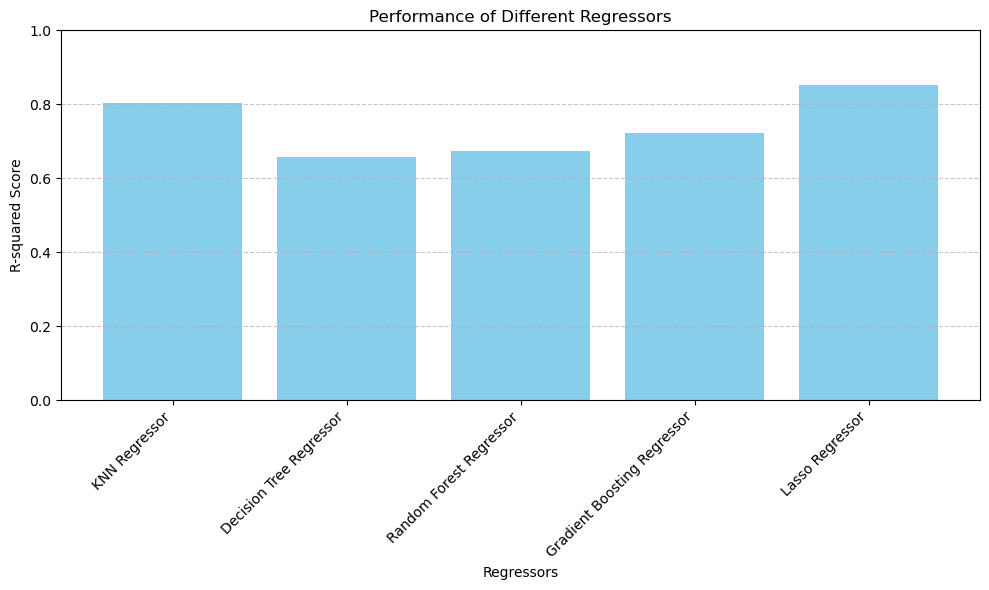

In [47]:
import matplotlib.pyplot as plt

# R-squared scores of different regressors
regressors = ['KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Lasso Regressor']
r2_scores = [0.802184, 0.658105, 0.673056, 0.722033, 0.853348]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(regressors, r2_scores, color='skyblue')
plt.xlabel('Regressors')
plt.ylabel('R-squared Score')
plt.title('Performance of Different Regressors')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## vii) Cerated a stacking Regressor using Hyperparameter Tuning ##

In [49]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from mlxtend.regressor import StackingCVRegressor
from skopt import BayesSearchCV
import numpy as np

# Assuming 'data' and 'target_data' are predefined and 'targets_names' is a list of target column names
X = data[data['is_train'] == True].drop(columns=targets_names)  # Features excluding the target columns
y = target_data['Q0_TOTAL_ASSETS']  # Target variable

# Define base regressors with names
base_regressors = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('lasso', Lasso())
]

# Define meta regressor
meta_regressor = RandomForestRegressor(random_state=42)

# Initialize stacking regressor with named regressors
stacking_regressor = StackingCVRegressor(
    regressors=[reg for _, reg in base_regressors],
    meta_regressor=meta_regressor,
    use_features_in_secondary=True,
    random_state=42,
    cv=5
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score of the stacking regressor:", r2)

# Hyperparameter tuning using Bayesian optimization
param_grid = {
    'rf__n_estimators': (10, 100),
    'rf__max_depth': (3, 10),
    'gbr__n_estimators': (10, 100),
    'gbr__max_depth': (3, 10),
    'lasso__alpha': (0.001, 10)
}

# Corrected BayesSearchCV initialization
bayes_search = BayesSearchCV(
    estimator=stacking_regressor,
    search_spaces=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    refit=True
)

# Perform Bayesian optimization
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = bayes_search.best_params_
print("Best hyperparameters:", best_params)


C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.204e+20, tolerance: 7.798e+19
  model = cd_fast.enet_coordinate_descent(
C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.045e+20, tolerance: 6.815e+19
  model = cd_fast.enet_coordinate_descent(
C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.694e+20, toleranc

R-squared score of the stacking regressor: 0.9750736725318037


ValueError: Invalid parameter 'gbr' for estimator StackingCVRegressor(meta_regressor=RandomForestRegressor(random_state=42),
                    random_state=42,
                    regressors=[RandomForestRegressor(random_state=42),
                                GradientBoostingRegressor(random_state=42),
                                Lasso()],
                    use_features_in_secondary=True). Valid parameters are: ['cv', 'meta_regressor', 'multi_output', 'n_jobs', 'pre_dispatch', 'random_state', 'refit', 'regressors', 'shuffle', 'store_train_meta_features', 'use_features_in_secondary', 'verbose'].

## viii) Predicitng the Test Data ##

### Of All the regressor models the Lasso Regressor Performed superior with the highest R2 Score, So we use this regressor to make our predictions of the test data Provided ###

In [50]:
# Create an empty dictionary to store predictions for each target using Lasso Regression Model
predictions = {}

# Initialize the Lasso Regression Model
lasso = Lasso()

# Iterate over each target variable
for target in targets_names:
    X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Id', axis=1), 
                                                        target_data[target], 
                                                        test_size=0.2, 
                                                        random_state=4)    
    lasso.fit(X_train, y_train)
    
    # Predict using the Lasso Regression Model, by dropping "Id" column
    y_pred = lasso.predict(test_data.drop('Id', axis=1))
    
    # Store the predictions in the dictionary
    predictions[target] = y_pred


C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+20, tolerance: 9.339e+19
  model = cd_fast.enet_coordinate_descent(
C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.058e+20, tolerance: 3.819e+19
  model = cd_fast.enet_coordinate_descent(
C:\Users\91826\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+20, toleranc

In [51]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame(predictions)

# Add the 'Id' column from the test_data DataFrame to the predictions DataFrame
predictions_df['Id'] = test_data['Id']

# Reorder columns to have 'Id' as the first column
columns_order = ['Id'] + targets_names
predictions_df = predictions_df[columns_order]

# Print the predictions DataFrame
predictions_df

,Id,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA
0,480,1.265770e+08,9.527040e+07,8.891178e+07,-6.463005e+06,-6.529012e+06,-1.561383e+07,-3.858407e+06,-6.327007e+06,-1.360044e+05
1,573,3.989776e+09,1.748811e+09,2.457895e+08,2.400424e+08,2.561758e+08,4.993324e+08,8.375407e+07,9.157500e+07,1.484674e+08
2,1967,1.526525e+07,1.586614e+07,-3.133898e+07,-2.104483e+07,-3.754527e+07,3.528809e+06,-2.482638e+07,-6.700925e+06,-1.434390e+07
3,57,7.053711e+09,3.774433e+09,3.844468e+09,1.149200e+08,2.052724e+08,2.793245e+08,4.448469e+06,6.069418e+07,5.422583e+07
4,131,4.586872e+09,3.327973e+09,1.601935e+09,1.913430e+08,8.210520e+08,1.010116e+09,9.775351e+07,1.117425e+08,7.960054e+07
...,...,...,...,...,...,...,...,...,...,...
397,885,1.361499e+10,8.542007e+09,6.126507e+09,5.659145e+08,1.193082e+09,1.735157e+09,1.812932e+08,3.904889e+08,1.754256e+08
398,385,1.975555e+09,2.194963e+09,-3.157316e+08,8.368178e+06,1.460884e+08,2.552277e+08,-1.135359e+08,1.053450e+08,-9.697671e+07
399,711,1.878183e+08,1.583450e+08,6.536453e+07,2.339352e+07,9.288262e+06,2.568988e+07,-4.029011e+06,2.363635e+07,-2.428297e+05
400,272,7.275850e+08,3.750862e+08,4.178110e+08,1.047836e+08,5.599505e+07,1.472181e+08,3.214379e+07,7.130281e+07,3.348077e+07


In [52]:
predictions_df.to_csv("submission.csv" ,index=False)


In [53]:
pd.read_csv('submission.csv')


,Id,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA
0,480,1.265770e+08,9.527040e+07,8.891178e+07,-6.463005e+06,-6.529012e+06,-1.561383e+07,-3.858407e+06,-6.327007e+06,-1.360044e+05
1,573,3.989776e+09,1.748811e+09,2.457895e+08,2.400424e+08,2.561758e+08,4.993324e+08,8.375407e+07,9.157500e+07,1.484674e+08
2,1967,1.526525e+07,1.586614e+07,-3.133898e+07,-2.104483e+07,-3.754527e+07,3.528809e+06,-2.482638e+07,-6.700925e+06,-1.434390e+07
3,57,7.053711e+09,3.774433e+09,3.844468e+09,1.149200e+08,2.052724e+08,2.793245e+08,4.448469e+06,6.069418e+07,5.422583e+07
4,131,4.586872e+09,3.327973e+09,1.601935e+09,1.913430e+08,8.210520e+08,1.010116e+09,9.775351e+07,1.117425e+08,7.960054e+07
...,...,...,...,...,...,...,...,...,...,...
397,885,1.361499e+10,8.542007e+09,6.126507e+09,5.659145e+08,1.193082e+09,1.735157e+09,1.812932e+08,3.904889e+08,1.754256e+08
398,385,1.975555e+09,2.194963e+09,-3.157316e+08,8.368178e+06,1.460884e+08,2.552277e+08,-1.135359e+08,1.053450e+08,-9.697671e+07
399,711,1.878183e+08,1.583450e+08,6.536453e+07,2.339352e+07,9.288262e+06,2.568988e+07,-4.029011e+06,2.363635e+07,-2.428297e+05
400,272,7.275850e+08,3.750862e+08,4.178110e+08,1.047836e+08,5.599505e+07,1.472181e+08,3.214379e+07,7.130281e+07,3.348077e+07
